In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [173]:
C_filepath = "short_timestep_data/MF_Ising/C_array_MF.csv"
#SvN_filepath = "data/XXZ_B_0.005/SvN_array_MF.csv"

df_C = pd.read_csv(C_filepath)
#df_SvN = pd.read_csv(SvN_filepath)

In [185]:
R = 40 
N = 201
dt = 0.005
array = df_C.to_numpy()
print(df_C)
print(np.shape(array))
C_r_t_40 = array[:,1]
tmax = 275
#times = np.linspace(dt,tmax,num=int(tmax/dt))
times = array[:,0]
#times = times[:-1]

#times = df_C["times"].to_numpy()
#chi = df_C["chi"].to_numpy()
#SvN = df_SvN.to_numpy() #MAY HAVE TO TRANSPOSE THIS
#C_r_t_5 = df_C["C_5"].to_numpy()
# C_r_t_10 = df_C["C_10"].to_numpy()
# C_r_t_20 = df_C["C_20"].to_numpy()
# C_r_t_30 = df_C["C_30"].to_numpy()
# C_r_t_40 = df_C["C_40"].to_numpy()
# C_r_t_50 = df_C["C_50"].to_numpy()
# C_r_t_60 = df_C["C_60"].to_numpy()
# C_r_t_70 = df_C["C_70"].to_numpy()
# C_r_t_80 = df_C["C_80"].to_numpy()
# C_r_t_90 = df_C["C_90"].to_numpy()



         times          C_40          C_50          C_60  chi
0        0.005  0.000000e+00  6.365880e-92  0.000000e+00    2
1        0.010 -0.000000e+00 -0.000000e+00 -0.000000e+00    2
2        0.015 -0.000000e+00  2.803561e-90 -0.000000e+00    2
3        0.020 -0.000000e+00 -0.000000e+00 -0.000000e+00    2
4        0.025 -0.000000e+00 -0.000000e+00 -0.000000e+00    2
...        ...           ...           ...           ...  ...
54995  274.980  1.523040e-61  1.319201e-61  6.404681e-62   32
54996  274.985  1.523108e-61  1.319282e-61  6.404685e-62   32
54997  274.990  1.523174e-61  1.319364e-61  6.404691e-62   32
54998  274.995  1.523240e-61  1.319445e-61  6.404699e-62   32
54999  275.000  1.523305e-61  1.319525e-61  6.404709e-62   32

[55000 rows x 5 columns]
(55000, 5)


''

C:\Users\rache\AppData\Local\Temp\ipykernel_11408\1961596556.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(times, np.log(C_r_t_40))


Text(0, 0.5, 'log(C(r,t))')

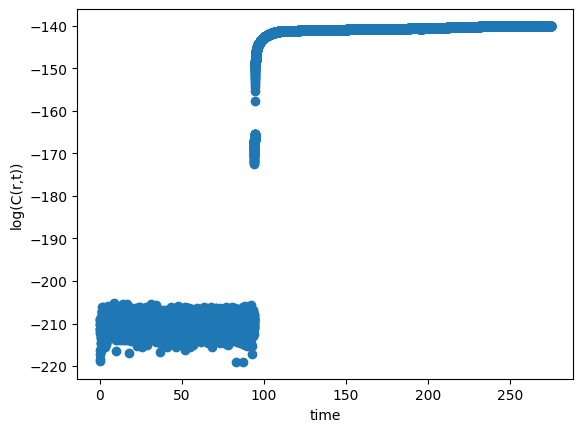

In [186]:
plt.scatter(times, np.log(C_r_t_40))
plt.xlabel("time")
plt.ylabel("log(C(r,t))")
#plt.xticks(np.arange(times.min(),times.max()+5,5))

In [187]:
t_sat = 105.0
stop_index = np.where(np.logical_and(times>t_sat, times<t_sat + dt))
stop_index = int(stop_index[0])
print(stop_index)


21000


C:\Users\rache\AppData\Local\Temp\ipykernel_11408\1823637642.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stop_index = int(stop_index[0])


In [188]:
indices = np.where(C_r_t_40 == 0.0)
print(indices)
if len(indices[0]):
    last = indices[-1][-1]
    time_data = np.real(times[last+1:stop_index])
    C_data = np.real(C_r_t_40[last+1:stop_index])

else:
    time_data = np.real(times)
    C_data = np.real(C_r_t_40)




(array([    0,     1,     2, ..., 18761, 18763, 18764], dtype=int64),)


In [189]:
saturation_t = 95
v_B = R/saturation_t

In [190]:
def C_early(t,lambda_p,p,v_B=v_B,limit_t=saturation_t,r=R):
    return -lambda_p * ((r/v_B - (t-limit_t))**(1+p))/((t-limit_t)**p)

In [191]:
def bound_vB(r_val,t_saturate):
    return r_val/t_saturate

In [215]:
guess = [1.2, 0.07,v_B,saturation_t]
# lambda_p, p, v_B
epsilon = 0.00000001
bounds=((-np.inf, -np.inf, v_B-epsilon,saturation_t-epsilon), (np.inf, np.inf, v_B+epsilon,saturation_t+epsilon))

popt, pcov = curve_fit(C_early, time_data, C_data, p0=guess)#, bounds=bounds)

popt

C:\Users\rache\AppData\Local\Temp\ipykernel_11408\3042402861.py:2: RuntimeWarning: invalid value encountered in power
  return -lambda_p * ((r/v_B - (t-limit_t))**(1+p))/((t-limit_t)**p)


array([1.20000000e+00, 7.00000000e-02, 4.21052632e-01, 9.50000000e+01])

C:\Users\rache\AppData\Local\Temp\ipykernel_11408\3042402861.py:2: RuntimeWarning: invalid value encountered in power
  return -lambda_p * ((r/v_B - (t-limit_t))**(1+p))/((t-limit_t)**p)


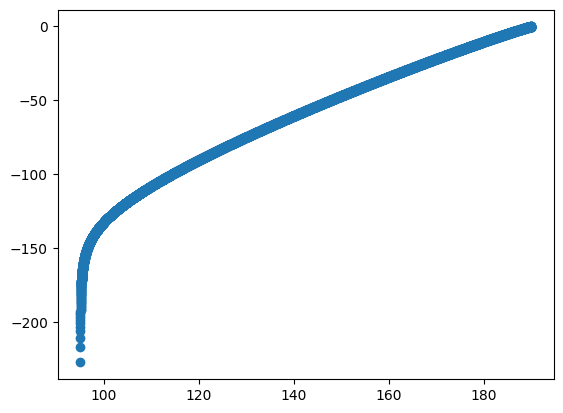

In [216]:
params = popt #[1.9,0.6,0.3]

#params = [1.0, 0.1, 0.421]
# force t < R/v_B


plt.scatter(times,C_early(times,*params))

C:\Users\rache\AppData\Local\Temp\ipykernel_11408\3042402861.py:2: RuntimeWarning: invalid value encountered in power
  return -lambda_p * ((r/v_B - (t-limit_t))**(1+p))/((t-limit_t)**p)


Text(0, 0.5, 'log(C_early(r,t))')

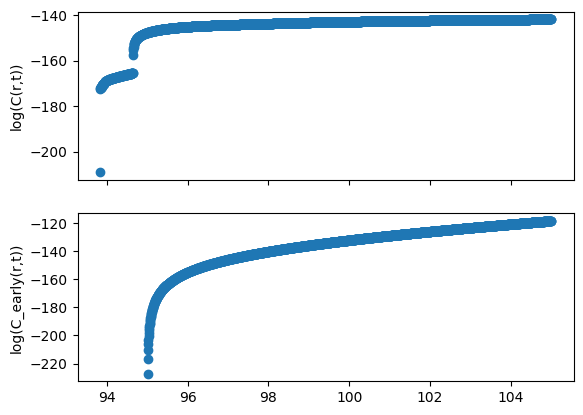

In [217]:
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].scatter(time_data,np.log(C_data))
ax[0].set_ylabel("log(C(r,t))")
ax[1].scatter(time_data, C_early(time_data,*params))
ax[1].set_ylabel("log(C_early(r,t))")

C:\Users\rache\AppData\Local\Temp\ipykernel_11408\3042402861.py:2: RuntimeWarning: invalid value encountered in power
  return -lambda_p * ((r/v_B - (t-limit_t))**(1+p))/((t-limit_t)**p)


Text(0, 0.5, 'log(C(r,t))')

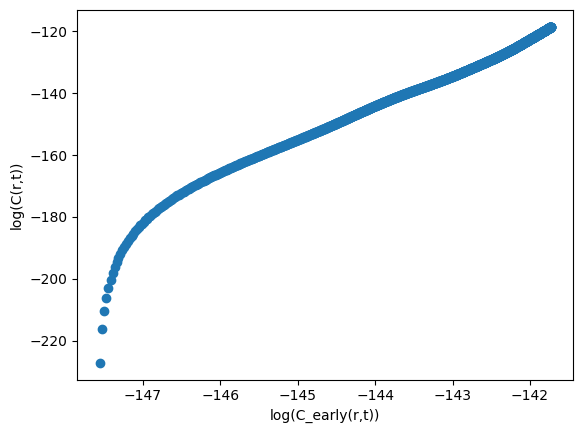

In [218]:
fig, ax = plt.subplots(1,1)
ax.scatter(np.log(C_data),C_early(time_data,*popt))
ax.set_xlabel("log(C_early(r,t))")
ax.set_ylabel("log(C(r,t))")